In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import glob
import jmkfigure

## Writeup:

- <file:///Users/jklymak/AbHillInterAnalysis/writeup/Notes.tex>
- <drafts5://open?uuid=3E1289D2-AC38-45B5-9A7D-6863F178DBE6>

## 3-km runs

### Isolated Bathymetry

Here we make a run with just an isolated patch of bathymetry.  The issue here is that a very energetic Taylor cap is spun up.  It precesses around the patch as a relatively slow (I think) mode-Kelvin wave.  This dominates the energetics.  



Issue is that a model run with an isolated patch of topography creates a Taylor cap.  This ends up dominating the 

Try a spunup version that does not start impulsively.  Idea is to reduce the Talyor cap...

Looks like the spinup was working, but doesn't particularly help?  


<IPython.core.display.Javascript object>


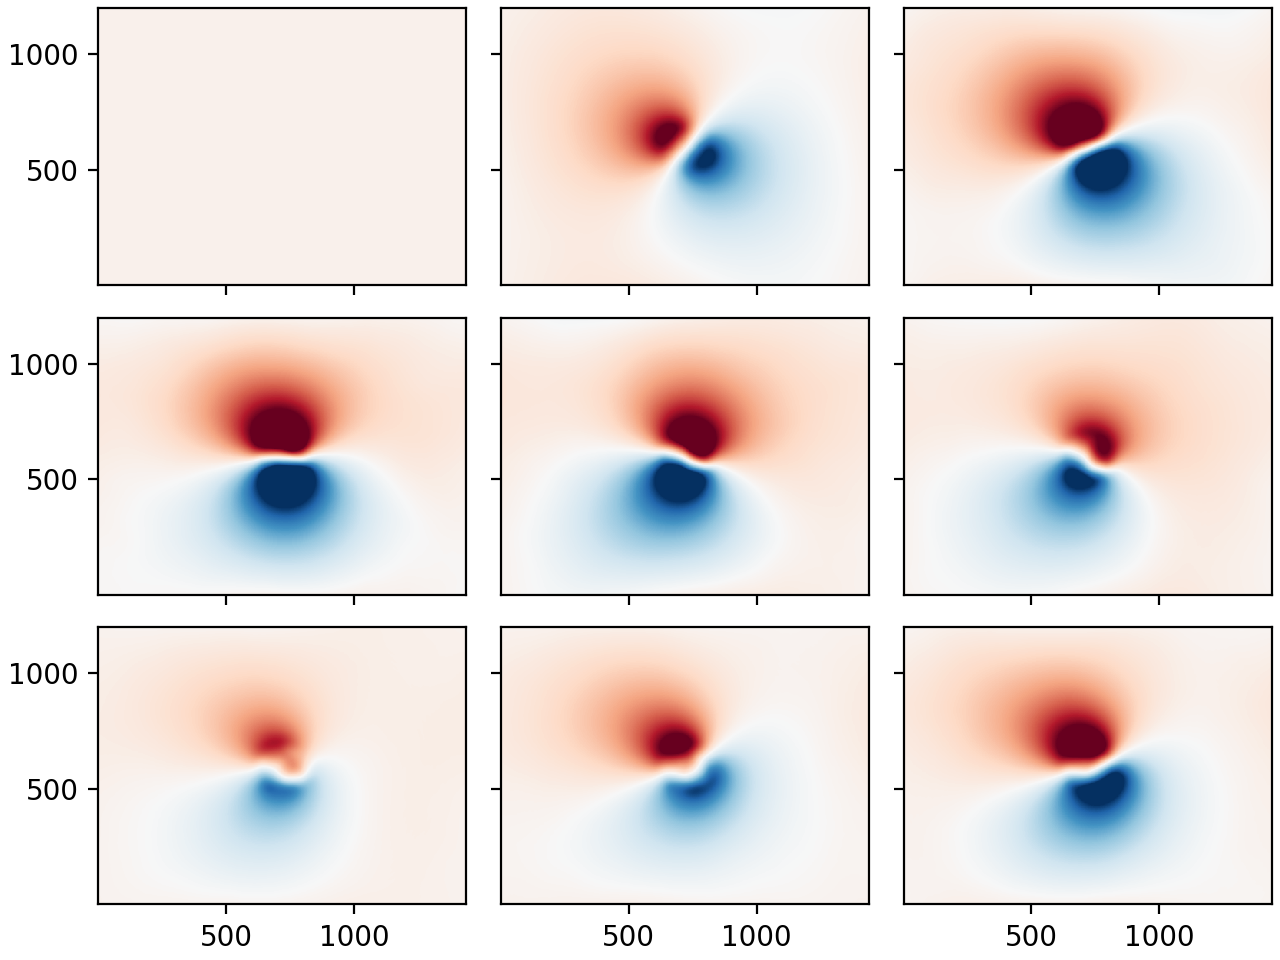

<IPython.core.display.Javascript object>


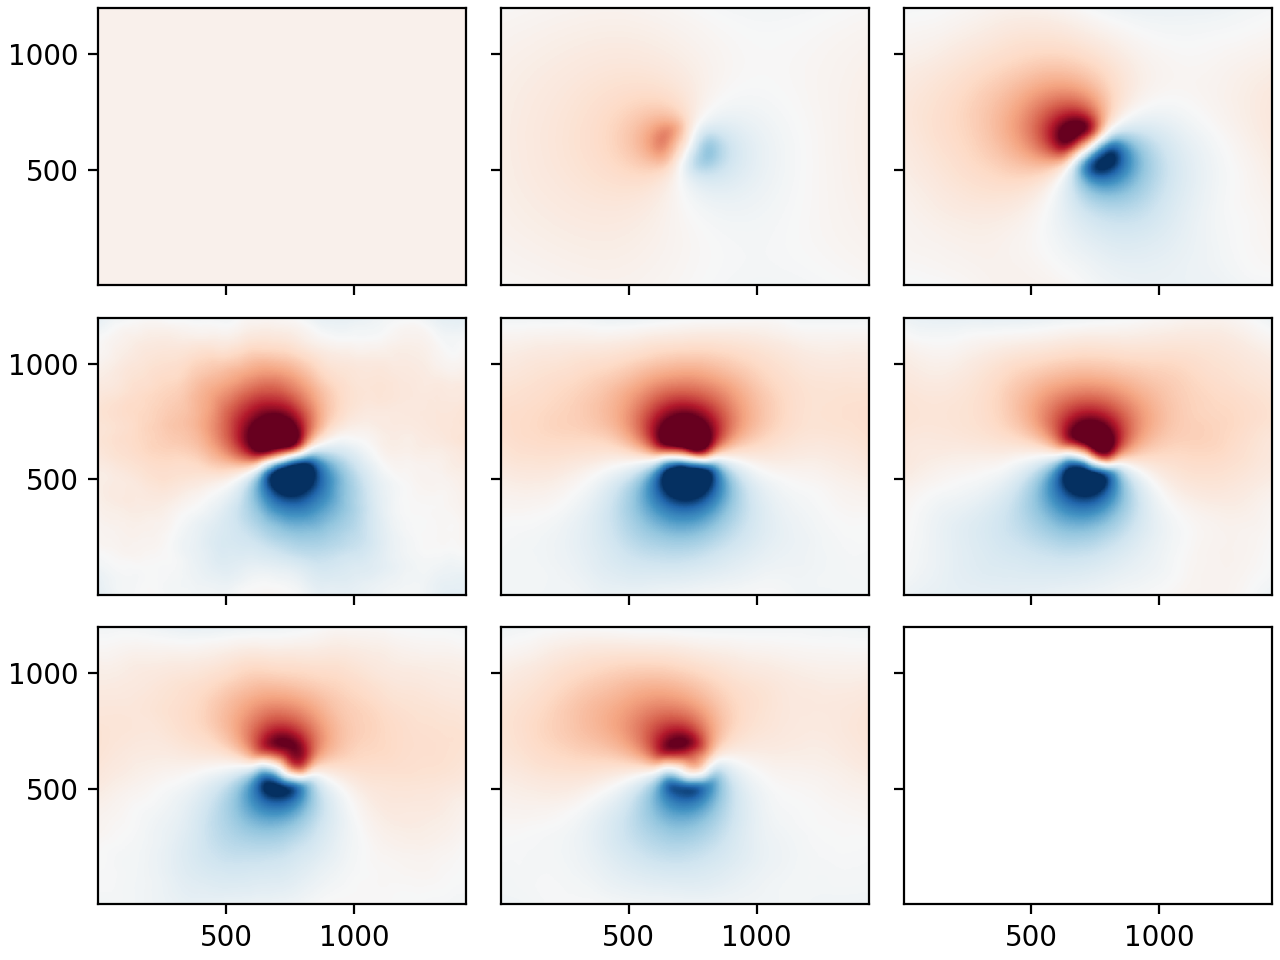

In [4]:
for td in ['reduceddata/Iso3kmlowU10Amp305f141B059Patch/twod.nc', 'reduceddata/Iso3kmlowU10Amp305f141B059PatchSu/twod.nc']:
    with xr.open_dataset(td) as ds:
        fig, ax = plt.subplots(3, 3, constrained_layout=True, sharex=True, sharey=True)
        for i in range(9):
            try:
                dd = ds.isel(time=i)
                axx=ax.flat[i]
                axx.pcolormesh(dd.XC/1e3, dd.YC/1e3, dd.ETAN[:-1,:-1]-dd.ETAN.mean(), vmin=-0.11, vmax=0.1, cmap='RdBu_r')
            except:
                pass



### Runs with all bathy:

Note that these have an issue that Eta becomes nonesense if we do things 

Work as a function of time:

<IPython.core.display.Javascript object>


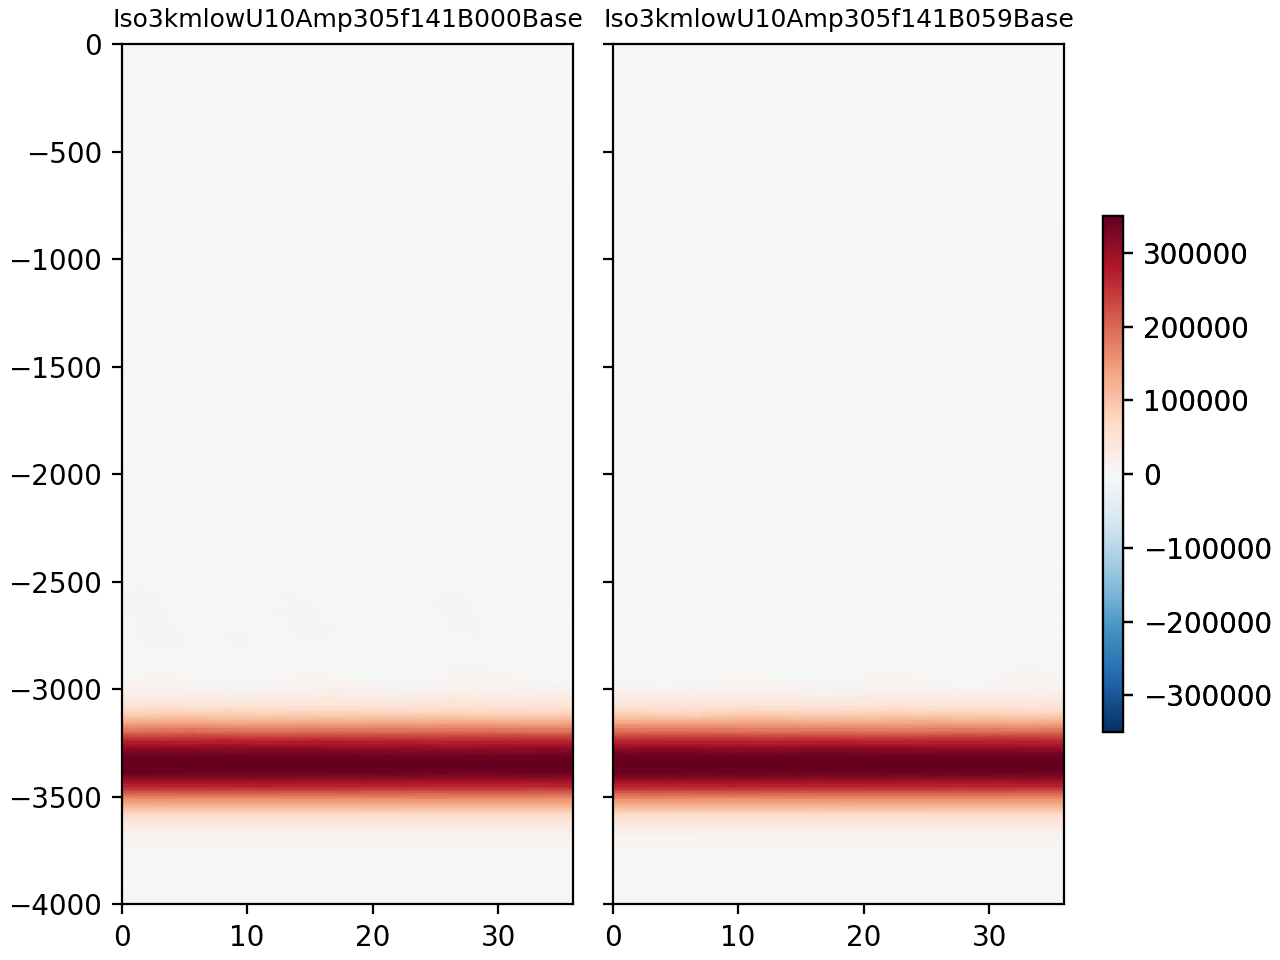

Figure(640x480)


In [5]:
ds = glob.glob('reduceddata/Iso3k*Base*')
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, constrained_layout=True)
for nn, d in enumerate(ds):
    with xr.open_dataset(f'{d}/work.nc') as ds:
        pc = axs.flat[nn].pcolormesh(np.arange(37), ds.Z, ds.work.T[:-1, :-1], cmap='RdBu_r', shading='flat',
                                     vmin=-3.5e5, vmax=3.5e5, rasterized=True)
        axs.flat[nn].set_title(d[12:], fontsize=9)
        axs.flat[nn].set_ylim(-4000, 0)
    fig.colorbar(pc, ax=axs, shrink=0.6)
jmkfigure.jmkprint('BaseRunsDiss', 'WorkSummary.ipynb')

<IPython.core.display.Javascript object>


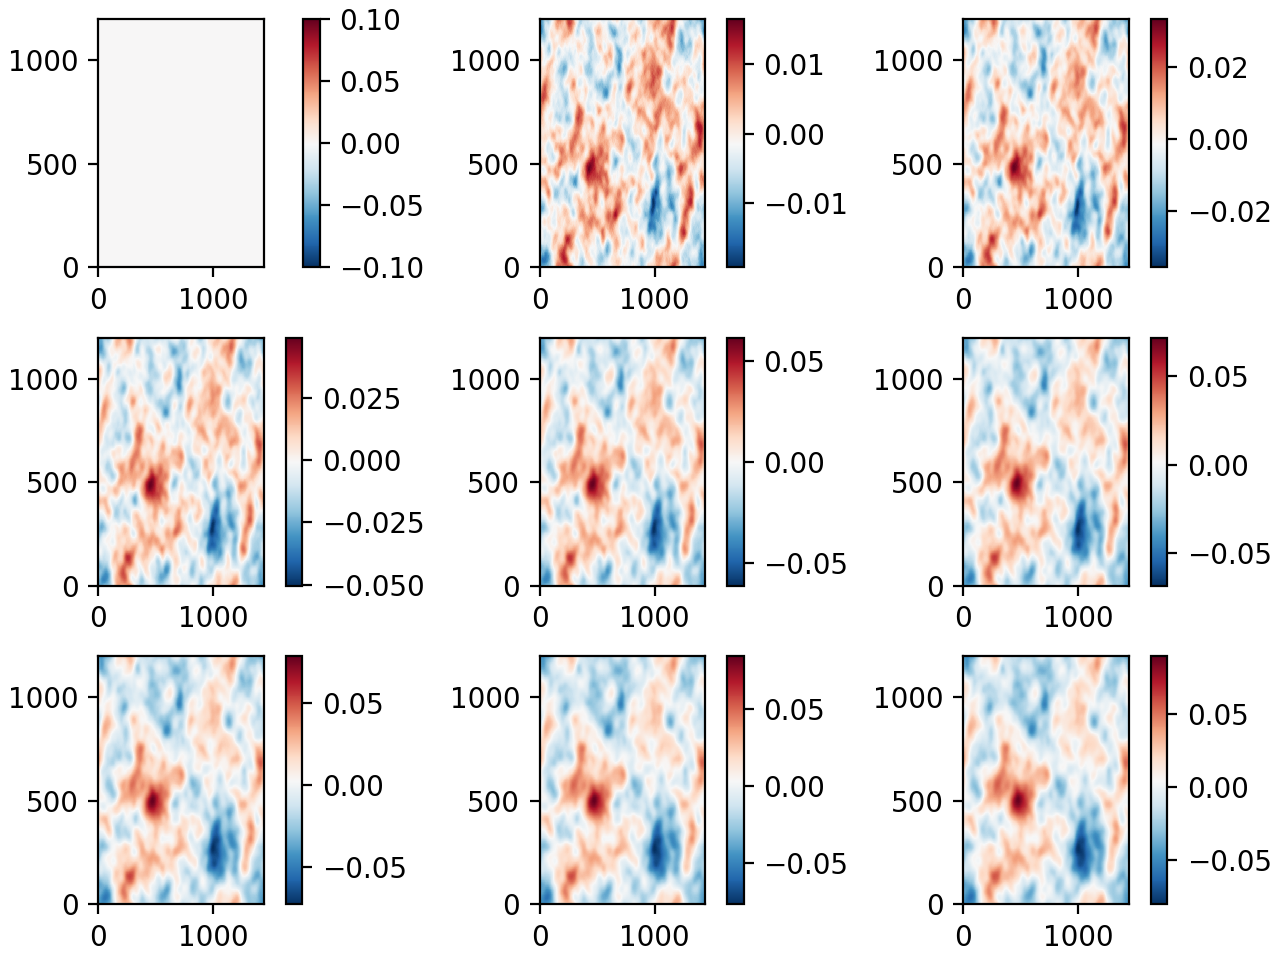

/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  

<xarray.DataArray 'ETAN' ()>
array(0.)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 00:00:00
<xarray.DataArray 'ETAN' ()>
array(1.33666507e-05)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 1 days
<xarray.DataArray 'ETAN' ()>
array(4.06530639e-05)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 2 days
<xarray.DataArray 'ETAN' ()>
array(6.50168119e-05)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 3 days
<xarray.DataArray 'ETAN' ()>
array(8.35583075e-05)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 4 days
<xarray.DataArray 'ETAN' ()>
array(9.73833899e-05)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 5 days
<xarray.DataArray 'ETAN' ()>
array(0.00010786)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 6 days
<xarray.DataArray 'ETAN' ()>
array(0.00011617)
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 7 days
<xarray.DataArray 'ETAN' ()>
array

/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  

In [6]:
with xr.open_dataset('reduceddata/Iso3kmlowU10Amp305f141B000Base/twod.nc') as ds:
    #ds = ds.isel(XC=50)
    fig, ax = plt.subplots(3, 3, constrained_layout=True)
    for i in range(9):
        dd = ds.isel(time=i)
        axx = ax.flat[i]
        pc = axx.pcolormesh(dd.XG/1e3, dd.YG/1e3, dd.ETAN, cmap='RdBu_r')
        print(dd.ETAN.mean())
        fig.colorbar(pc, ax=axx)
        #dd.ETAN.plot(ax=ax.flat[i], cmap='RdBu_r')

<xarray.Dataset>
Dimensions:  (XC: 1248, XG: 1248, YC: 128, YG: 128, Z: 400, Zl: 400, Zp1: 401, Zu: 400, time: 10)
Coordinates:
  * XC       (XC) float64 500.0 1.5e+03 2.5e+03 ... 1.246e+06 1.248e+06
  * YC       (YC) float64 500.0 1.5e+03 2.5e+03 ... 1.265e+05 1.275e+05
  * XG       (XG) float64 0.0 1e+03 2e+03 ... 1.245e+06 1.246e+06 1.247e+06
  * YG       (YG) float64 0.0 1e+03 2e+03 3e+03 ... 1.25e+05 1.26e+05 1.27e+05
  * Z        (Z) float64 -5.0 -15.0 -25.0 ... -3.975e+03 -3.985e+03 -3.995e+03
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 ... -3.98e+03 -3.99e+03 -4e+03
  * Zu       (Zu) float64 -10.0 -20.0 -30.0 -40.0 ... -3.98e+03 -3.99e+03 -4e+03
  * Zl       (Zl) float64 0.0 -10.0 -20.0 ... -3.97e+03 -3.98e+03 -3.99e+03
    rA       (YC, XC) float64 ...
    dxG      (YG, XC) float64 ...
    dyG      (YC, XG) float64 ...
    Depth    (YC, XC) float64 ...
    rAz      (YG, XG) float64 ...
    dxC      (YC, XG) float64 ...
    dyC      (YG, XC) float64 ...
    rAw      (YC, X

<IPython.core.display.Javascript object>


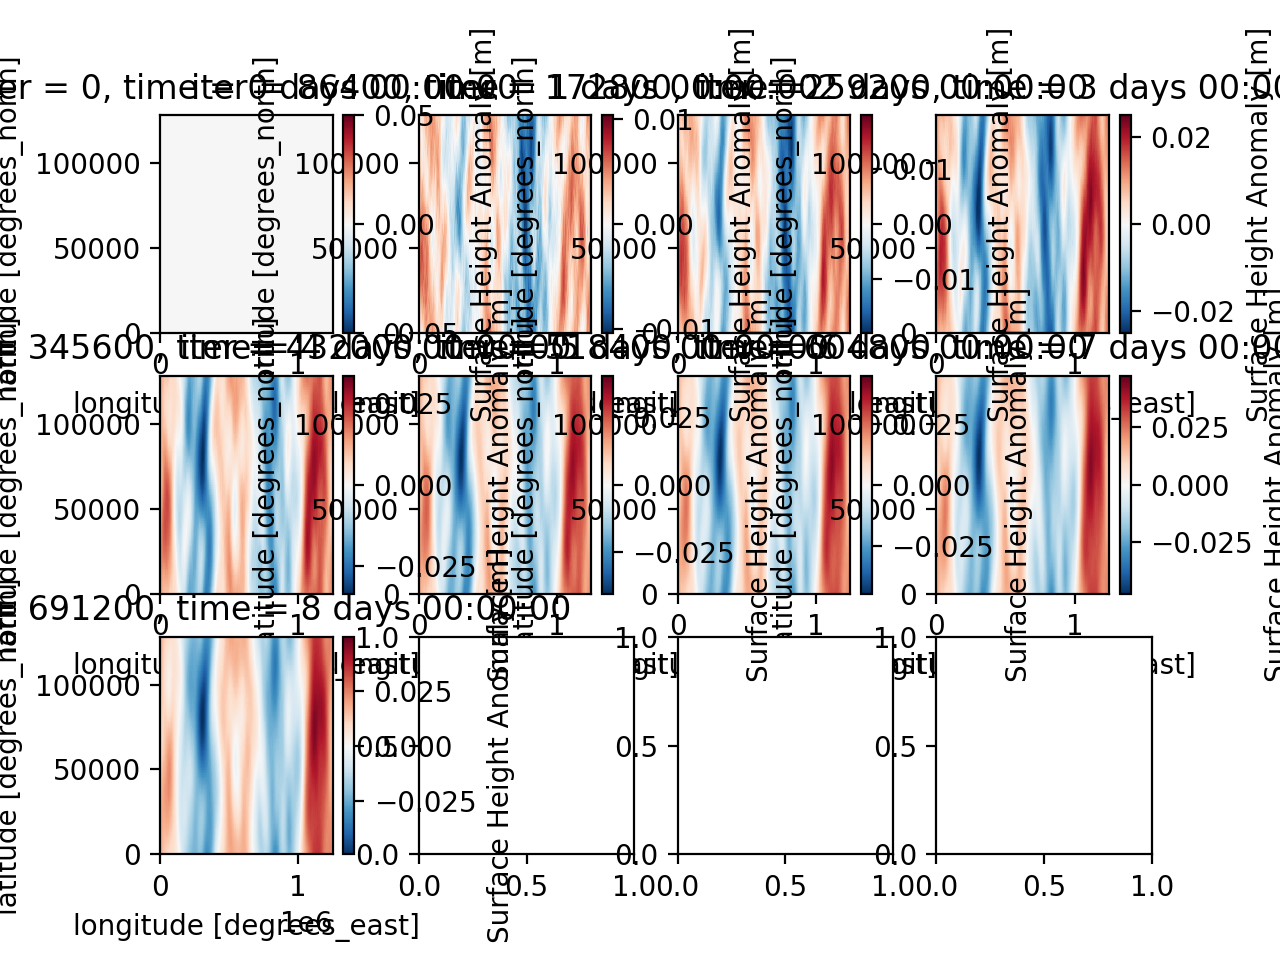

<xarray.DataArray 'time' ()>
array(0, dtype='timedelta64[ns]')
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 00:00:00
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
    calendar:       gregorian
<xarray.DataArray 'time' ()>
array(86400000000000, dtype='timedelta64[ns]')
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 1 days
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
    calendar:       gregorian
<xarray.DataArray 'time' ()>
array(172800000000000, dtype='timedelta64[ns]')
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 2 days
Attributes:
    standard_name:  time
    long_name:      Time
    axis:           T
    calendar:       gregorian
<xarray.DataArray 'time' ()>
array(259200000000000, dtype='timedelta64[ns]')
Coordinates:
    iter     int64 ...
    time     timedelta64[ns] 3 days
Attributes:
    standard_name:  time
    long_name:      Time
    axis:    

In [11]:
with xr.open_dataset('reduceddata/Iso1kmlowU10Amp305f141B000Base/twod.nc') as ds:
    print(ds)
    #ds = ds.isel(XC=50)
    fig, ax = plt.subplots(3, 4)
    for i in range(9):
        dd = ds.isel(time=i)
        print(dd.time)
        dd.ETAN.plot(ax=ax.flat[i], cmap='RdBu_r')

In [32]:
print(ds)

<xarray.Dataset>
Dimensions:  (XC: 1248, XG: 1248, Z: 400, Zl: 400, Zp1: 401, Zu: 400, time: 36)
Coordinates:
  * XC       (XC) float64 500.0 1.5e+03 2.5e+03 ... 1.246e+06 1.248e+06
    YC       float64 ...
  * XG       (XG) float64 0.0 1e+03 2e+03 ... 1.245e+06 1.246e+06 1.247e+06
    YG       float64 ...
  * Z        (Z) float64 -5.0 -15.0 -25.0 ... -3.975e+03 -3.985e+03 -3.995e+03
  * Zp1      (Zp1) float64 0.0 -10.0 -20.0 -30.0 ... -3.98e+03 -3.99e+03 -4e+03
  * Zu       (Zu) float64 -10.0 -20.0 -30.0 -40.0 ... -3.98e+03 -3.99e+03 -4e+03
  * Zl       (Zl) float64 0.0 -10.0 -20.0 ... -3.97e+03 -3.98e+03 -3.99e+03
    rA       (XC) float64 ...
    dxG      (XC) float64 ...
    dyG      (XG) float64 ...
    Depth    (XC) float64 ...
    rAz      (XG) float64 ...
    dxC      (XG) float64 ...
    dyC      (XC) float64 ...
    rAw      (XG) float64 ...
    rAs      (XC) float64 ...
    drC      (Zp1) float64 ...
    drF      (Z) float64 ...
    PHrefC   (Z) float64 ...
    PHrefF   (Zp1